# Nick Park - Vehicle Claim Prediction
### Predicting which policy will file claim in the next six months

In [136]:
### Import Packages ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.ensemble
import sklearn.linear_model
import sklearn.metrics

import imblearn.over_sampling
from collections import Counter

import random as rnd

pd.set_option('display.max_columns', 150) # print all columns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 150) # print all columns

## Import Data & EDA

In [72]:
data = pd.read_csv('D:/SWP/jupyter_workspace/Interview/vehicle_claim_classification/train.csv')

In [73]:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [74]:
data.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.00,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [76]:
# convert features with less than 6 distinct values as object
df = data.copy()

for col in df.columns:
    if len(df[f'{col}'].unique()) < 6:
        df[f'{col}'] = df[f'{col}'].astype('object')

In [77]:
# check data type again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  object 
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [78]:
# define columns
cat_cols = [cname for cname in df.columns if 
            df[cname].dtype in ["object", "bool"]]

num_cols_std = ['age_of_car', 'age_of_policyholder']

num_cols = [cname for cname in df.columns if
            cname not in cat_cols and
            cname not in num_cols_std]

print(cat_cols)
print(num_cols)

['policy_id', 'area_cluster', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']
['policy_tenure', 'population_density', 'displacement', 'turning_radius', 'length', 'width', 'height', 'gross_weight']


## Feature Engineering

In [79]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [80]:
# drop policy_id
df = df.drop('policy_id', axis = 1)
cat_cols.remove('policy_id')
cat_cols.remove('is_claim')

In [81]:
# Check for separation issue - no separation issue
for col in cat_cols:
    x = pd.DataFrame(df.groupby(['is_claim', str(col)]).size())
    if len(x[x[0] == 0]) == 0:
        continue
    else:
        print(x[x[0] == 0])

In [82]:
# separate feature & target
df_feature = df.drop('is_claim', axis = 1)
df_target = df['is_claim']

In [83]:
# one-hot encode categorical features
df_feature = pd.get_dummies(df_feature)

# MinMax Scaler for numeric features
scaler = MinMaxScaler()
df_feature[num_cols] = scaler.fit_transform(df_feature[num_cols])

D:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [85]:
# check feature df
df_feature.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,displacement,turning_radius,length,width,height,gross_weight,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,make_1,make_2,make_3,make_4,make_5,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,max_torque_113Nm@4400rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_113.45bhp@4000rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_1,airbags_2,airbags_6,is_esc_No,is_esc_Yes,is_adjustable_steering_No,is_adjustable_steering_Yes,is_tpms_No,is_tpms_Yes,is_parking_sensors_No,is_parking_sensors_Yes,is_parking_camera_No,is_parking_camera_Yes,rear_brakes_type_Disc,rear_brakes_type_Drum,cylinder_3,cylinder_4,transmission_type_Automatic,transmission_type_Manual,gear_box_5,gear_box_6,steering_type_Electric,steering_type_Manual,steering_type_Power,is_front_fog_lights_No,is_front_fog_lights_Yes,is_rear_window_wiper_No,is_rear_window_wiper_Yes,is_rear_window_washer_No,is_rear_window_washer_Yes,is_rear_window_defogger_No,is_rear_window_defogger_Yes,is_brake_assist_No,is_brake_assist_Yes,is_power_door_locks_No,is_power_door_locks_Yes,is_central_locking_No,is_central_locking_Yes,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes,ncap_rating_0,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,

In [104]:
# check for imbalance in target
print(len(df_target[df_target == 1])/len(df_target))

0.06396777717094485


In [114]:
df_feature.dtypes
len(df_feature.columns)


139

In [105]:
# separate target & feature
x = df_feature.copy()
y = df_target.copy()

# split train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0)

In [173]:
# Over-sample - train set only
sme = imblearn.over_sampling.SMOTENC(random_state=0, categorical_features=np.arange(10, 139, 1))
x_res, y_res = sme.fit_resample(x_train, y_train.astype(int))

In [174]:
print(Counter(y_train))
print(Counter(y_res)) # oversampled

Counter({0: 38386, 1: 2628})
Counter({0: 38386, 1: 38386})


## Prediction - Random Forest

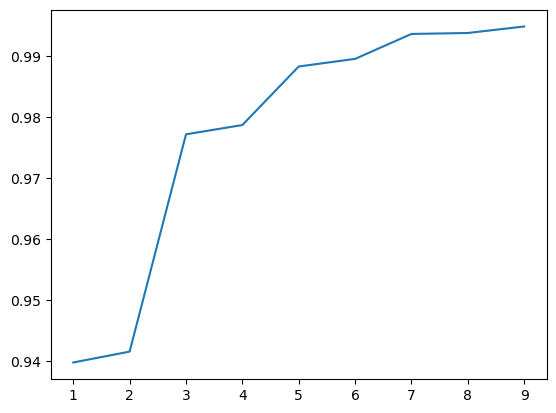

In [175]:
# number of trees
metric = []

for k in range(1, 10, 1):
    rfc = sklearn.ensemble.RandomForestClassifier(n_estimators = k)
    rfc.fit(x_res, y_res)
    pred_train = rfc.predict(x_res)
    metric.append(sklearn.metrics.roc_auc_score(y_res, pred_train))

plt.plot(range(1, 10, 1), metric)

In [176]:
# sqrt of # of features
np.sqrt(len(x_res.columns))

11.789826122551595

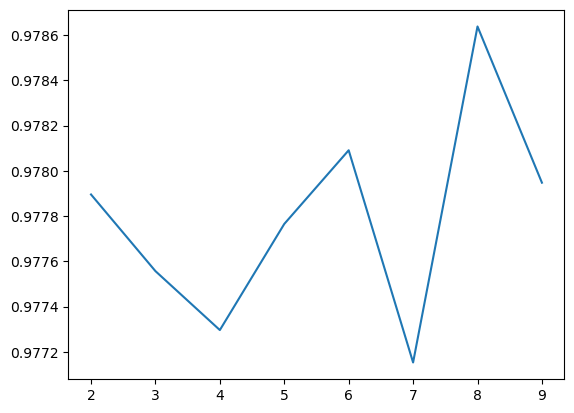

In [177]:
# max features 
metric = []

for k in range(2, 10, 1):
    rfc = sklearn.ensemble.RandomForestClassifier(n_estimators = 3, max_features = k)
    rfc.fit(x_res, y_res)
    pred_train = rfc.predict(x_res)
    metric.append(sklearn.metrics.roc_auc_score(y_res, pred_train))

plt.plot(range(2, 10, 1), metric)

In [178]:
# tune rest of the hyperparameters
grid = GridSearchCV(sklearn.ensemble.RandomForestClassifier(random_state=0),
                    param_grid={'n_estimators' : np.arange(3, 11, 1),
                                'max_features' : np.arange(2, 6, 1),
                                'min_samples_leaf' : np.arange(1, 100, 20),
                                'max_depth' : np.arange(2, 10, 1)
                               }, cv=5, n_jobs=-1)

grid.fit(x_res, y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([2, 3, 4, 5]),
                         'min_samples_leaf': array([ 1, 21, 41, 61, 81]),
                         'n_estimators': array([ 3,  4,  5,  6,  7,  8,  9, 10])})

In [179]:
# function for parameter & score reporting
def grid_top(cv_results, num_results = 10, asc = True):
    test = pd.DataFrame(data = [cv_results['rank_test_score'],
                                cv_results['params'], 
                                cv_results['mean_test_score']
                               ]).T
    test.columns = ['rank_test_score', 'params', 'mean_test_score']
    test = test.sort_values(by = 'rank_test_score', ascending = asc)
    print(test.head(num_results))

In [180]:
# RF grid search results
grid_top(grid.cv_results_, 20)

     rank_test_score  \
1207               1   
1127               2   
1206               3   
1247               4   
1246               5   
1125               6   
1167               7   
1205               8   
1166               9   
1126              10   
1245              11   
1165              12   
1124              13   
1204              14   
1244              15   
1203              16   
1243              17   
1123              18   
1164              19   
1254              20   

                                                                              params  \
1207  {'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 10}   
1127  {'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 10}   
1206   {'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 9}   
1247  {'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 10}   
1246   {'max_depth': 9, 'max_features': 5, 'min_samples

In [182]:
x_test = x_test.drop(columns = 'random', axis = 1)

In [183]:
# evaluate using the best parameters
rfc = sklearn.ensemble.RandomForestClassifier(n_jobs=-1).set_params(**grid.best_params_)
rfc.fit(x_res, y_res)
y_pred_test = rfc.predict(x_test)

sklearn.metrics.roc_auc_score(y_test.astype(int), y_pred_test)

0.5945649532142423

In [184]:
print(sklearn.metrics.classification_report(y_test.astype(int), y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69     16458
           1       0.09      0.65      0.15      1120

    accuracy                           0.55     17578
   macro avg       0.52      0.59      0.42     17578
weighted avg       0.90      0.55      0.66     17578



In [185]:
sklearn.metrics.confusion_matrix(y_test.astype(int), y_pred_test)
# True Negative | False Positive
# False Negative | True Positive

array([[8873, 7585],
       [ 392,  728]], dtype=int64)

In [ ]:
# tune rest of the hyperparameters
grid = GridSearchCV(sklearn.ensemble.RandomForestClassifier(n_estimators = 9, random_state=0),
                    param_grid={'n_estimators' : np.arange(3, 11, 1),
                                'max_features' : np.arange(2, 6, 1),
                                'max_depth' : np.arange(2, 5, 1)
                               }, cv=5, n_jobs=-1)

grid.fit(x_res, y_res)

In [134]:
# Feature Importance
rf_feature_imp = pd.DataFrame({'feature_name' : list(x_res.columns),
                               'importance' : list(rfc.feature_importances_)}).sort_values(by='importance', ascending=False) 

print(rf_feature_imp)

                              feature_name  importance
0                            policy_tenure    0.301603
1                               age_of_car    0.299694
2                      age_of_policyholder    0.263331
3                       population_density    0.043839
30                         area_cluster_C8    0.005594
31                         area_cluster_C9    0.005040
15                        area_cluster_C14    0.004740
21                         area_cluster_C2    0.004661
14                        area_cluster_C13    0.004610
27                         area_cluster_C5    0.004537
29                         area_cluster_C7    0.004399
25                         area_cluster_C3    0.004189
13                        area_cluster_C12    0.004006
10                         area_cluster_C1    0.003544
12                        area_cluster_C11    0.003531
11                        area_cluster_C10    0.003326
16                        area_cluster_C15    0.003168
20        

In [157]:
# Add a random feature to the model
rnd_feature = []
rnd_feature2 = []

for i in range(len(x_res)):
    rnd_feature.append(rnd.random())
    
    
for i in range(len(x_test)):
    rnd_feature2.append(rnd.random())

In [158]:
x_res['random'] = rnd_feature
x_test['random'] = rnd_feature2

In [159]:
# tune rest of the hyperparameters
grid = GridSearchCV(sklearn.ensemble.RandomForestClassifier(n_estimators = 60,
                                                            max_features = 'sqrt',
                                                            random_state=0),
                    param_grid={'min_impurity_decrease': np.arange(0, 0.011, 0.001),
                                'ccp_alpha': np.arange(0, 0.011, 0.001)
                               }, cv=3, n_jobs=-1)

grid.fit(x_res, y_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=60, random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ]),
                         'min_impurity_decrease': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ])})

In [160]:
# evaluate using the best parameters
rfc = sklearn.ensemble.RandomForestClassifier(n_jobs=-1).set_params(**grid.best_params_)
rfc.fit(x_res, y_res)
y_pred_test = rfc.predict(x_test)

In [161]:
# Feature Importance
rf_feature_imp = pd.DataFrame({'feature_name' : list(x_res.columns),
                               'importance' : list(rfc.feature_importances_)}).sort_values(by='importance', ascending=False) 

print(rf_feature_imp)

                              feature_name  importance
1                               age_of_car    0.259000
0                            policy_tenure    0.252858
2                      age_of_policyholder    0.219915
139                                 random    0.136782
3                       population_density    0.041424
30                         area_cluster_C8    0.005678
31                         area_cluster_C9    0.005067
21                         area_cluster_C2    0.004854
14                        area_cluster_C13    0.004719
27                         area_cluster_C5    0.004673
15                        area_cluster_C14    0.004460
29                         area_cluster_C7    0.004256
25                         area_cluster_C3    0.004055
13                        area_cluster_C12    0.003912
12                        area_cluster_C11    0.003472
11                        area_cluster_C10    0.003271
10                         area_cluster_C1    0.003128
16        

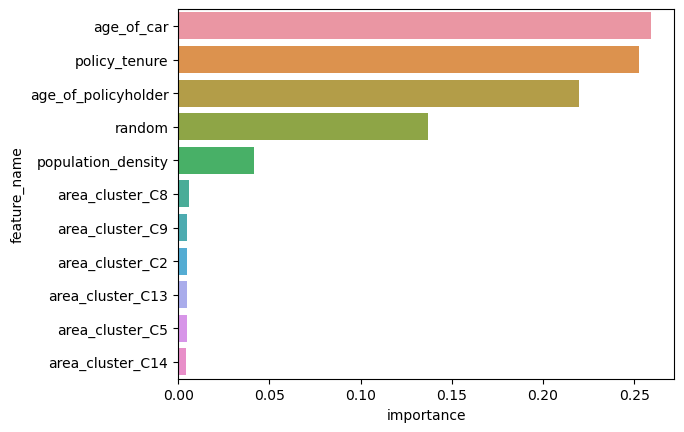

In [163]:
# feature importance plot
sns.barplot(x=rf_feature_imp[0:11].importance, 
            y=rf_feature_imp[0:11].feature_name)
plt.show()

In [167]:
# Choose only those features that are better than 'random'
feature_col_top = rf_feature_imp[0:3].feature_name

x_res_top = x_res[feature_col_top]
x_test_top = x_test[feature_col_top]

### Re-tune with the three variables

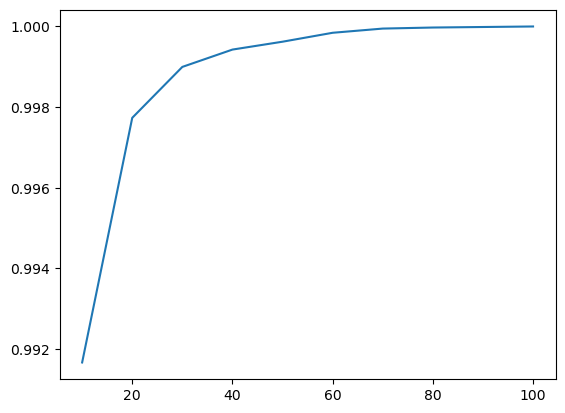

In [168]:
# number of trees
metric = []

for k in range(10, 110, 10):
    rfc = sklearn.ensemble.RandomForestClassifier(n_estimators = k)
    rfc.fit(x_res_top, y_res)
    pred_train = rfc.predict(x_res_top)
    metric.append(sklearn.metrics.roc_auc_score(y_res, pred_train))

plt.plot(range(10, 110, 10), metric)